<a href="https://colab.research.google.com/github/AndrewTShen/pytorch-explorations/blob/master/loss_and_gradient_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss and Gradient Examples

## Introduction
This notebook contains two examples that demonstrate how loss and gradient functions work in PyTorch. 

## Table of Contents
[1.](#example1) In the first, we write a simple loss function and try to minimize a parabola.

[2.](#example2) In the second, we initialize N points and try to find the shortest path from (0, 0) to (100, 100). This uses slightly more complex function, but in terms of training is roughly the same.

In [1]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 

     |████████████████████████████████| 592.3MB 41.0MB/s 
ERROR: torchvision 0.3.0 has requirement torch>=1.1.0, but you'll have torch 0.3.0.post4 which is incompatible.
ERROR: fastai 1.0.54 has requirement torch>=1.0.0, but you'll have torch 0.3.0.post4 which is incompatible.
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0


In [2]:
!pip3 install torchvision

     |████████████████████████████████| 676.9MB 23kB/s 
  Found existing installation: torch 0.3.0.post4
    Uninstalling torch-0.3.0.post4:
      Successfully uninstalled torch-0.3.0.post4


In [0]:
use_cuda = True # If cuda is unavaliable, comment out.

<a id='example1'></a>

## Example 1: Parabola Minimum
In this section, we use pytorch to perform gradient descent on a parabola function (defined by squared) in order to find the minimum point on the parabola

##### Imports

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##### Code

In [0]:
# Our parabola function
def squared(x):
  return torch.pow(x, 2)

Start x:  247.43942260742188
Final x:  -4.27019782981398e-39
[tensor([61226.2695], grad_fn=<PowBackward0>), tensor([61176.7852], grad_fn=<PowBackward0>), tensor([61127.3242], grad_fn=<PowBackward0>), tensor([61077.8945], grad_fn=<PowBackward0>), tensor([61028.4805], grad_fn=<PowBackward0>), tensor([60979.0859], grad_fn=<PowBackward0>), tensor([60929.7109], grad_fn=<PowBackward0>), tensor([60880.3594], grad_fn=<PowBackward0>), tensor([60831.0352], grad_fn=<PowBackward0>), tensor([60781.7266], grad_fn=<PowBackward0>), tensor([60732.4492], grad_fn=<PowBackward0>), tensor([60683.1914], grad_fn=<PowBackward0>), tensor([60633.9609], grad_fn=<PowBackward0>), tensor([60584.7500], grad_fn=<PowBackward0>), tensor([60535.5664], grad_fn=<PowBackward0>), tensor([60486.4023], grad_fn=<PowBackward0>), tensor([60437.2656], grad_fn=<PowBackward0>), tensor([60388.1562], grad_fn=<PowBackward0>), tensor([60339.0703], grad_fn=<PowBackward0>), tensor([60290.0078], grad_fn=<PowBackward0>), tensor([60240.9727

Text(0, 0.5, 'Loss')

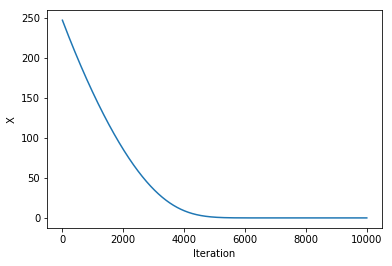

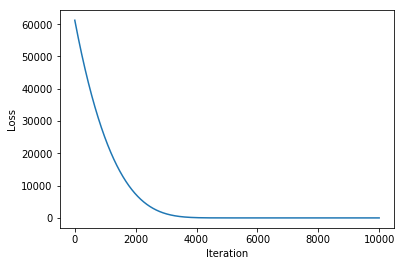

In [6]:
# generate starting point
x = (200) * torch.rand(1) + 100
x.requires_grad_()

start = x.data[0].item()

# create Adam optimizer
optimizer = optim.Adam([x], lr=0.1)

# for use in graph
data = []
data_loss = []

# training
for i in range(10000):
  loss = squared(x)
  data_loss.append(loss)
  loss.backward()
  optimizer.step()    # Does the update
  optimizer.zero_grad()
  data.append(x.data[0].item())

final = x.data[0].item()

print("Start x: ", start)
print("Final x: ", final)

# Plot all data
plt.figure(1)
plt.plot(data)
plt.xlabel("Iteration")
plt.ylabel("X")

plt.figure(2)
plt.plot(data_loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")

<a id='example2'></a>

## Example 2: Shortest Path Problem
In this section, we use pytorch to find a N intermediate points between a start and final point which is along the shortest path from the start and final point. We will use the points (0, 0) and (100, 100) as our starting and final points respective for simplicity.

##### Imports

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

##### Code

In [0]:
# Loss Function
def Loss_length(inp):
  path = torch.cat( (torch.tensor([[0.,0.]]), inp, torch.tensor([[100., 100.]])), 0)  
  # inp is a tensor of size (n, 2)
  return torch.stack([torch.dist(path[i+1], path[i]) for i in range(path.shape[0]-1)]).sum(dim=0)

Start x:  [[ -32.971695   47.02575 ]
 [ -87.77345   -51.237316]
 [-100.180786 -142.73038 ]
 [  19.41597  -122.203   ]
 [-131.07019   -90.10007 ]]
Final x:  [[0.15051927 0.15051927]
 [0.27615163 0.27615163]
 [0.3468386  0.3468386 ]
 [0.4387226  0.4387226 ]
 [0.48985213 0.48985213]]


[]

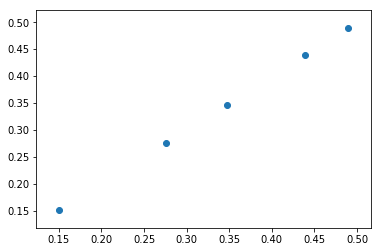

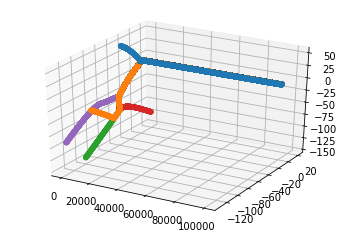

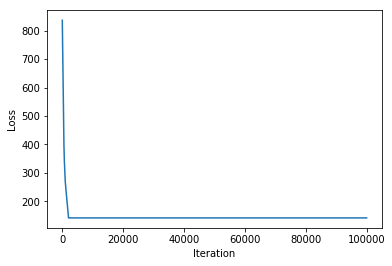

In [9]:
# generate starting points
x = (100) * torch.randn(5, 2) - 50
x.requires_grad_()

# set number of iteration
num_iterations = 100000

start = x.data.numpy().copy()

#b create Adam optimizer
optimizer = optim.Adam([x], lr=0.1)

# for use in graph
data = []
data_loss = []

# training
for i in range(num_iterations):
  loss = Loss_length(x)
  data_loss.append(loss)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  data.append(x.data.numpy().copy())

final = x.data.numpy().copy()

# Print starting points and ending points.
print("Start x: ", start)
print("Final x: ", final)

data = np.array(data)

# Plot all data

# Figure 0: Demonstrate converges to linear
plt.figure(0)
plt.scatter(final[:,0], final[:,1])

# Show change over time
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
for i in range(5):
  ax.scatter(np.arange(num_iterations), data[:, i, 0], data[:, i, 1])

# Loss over time
plt.figure(2)
plt.plot(data_loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot()